In [4]:
include("../Inversion/Plot.jl")
include("../Inversion/KalmanInversion.jl")
include("Linear.jl")

forward_aug (generic function with 1 method)

# Two Parameter Linear Inverse Problems

Consider the 2-parameter linear inverse problem
$$y = G\theta + \eta.$$
with $\eta \sim \mathcal{N}(0, 0.1^2I)$. We explore the following three scenarios

#### non-singular (well-determined) system (NS) 
   $$
   y = \begin{bmatrix}
        3 \\
        7 
       \end{bmatrix} \quad
       G = \begin{bmatrix}
        1 & 2\\
        3 & 4
    \end{bmatrix} \quad
    \theta_{ref} = \begin{bmatrix}
        1 \\
        1 
       \end{bmatrix};
   $$ 
   
#### over-determined system (OD)
$$ y = \begin{bmatrix}
        3 \\
        7 \\
        10
       \end{bmatrix} \quad
       G = \begin{bmatrix}
        1 & 2\\
        3 & 4 \\
        5 & 6
    \end{bmatrix} \quad
    \theta_{ref} = \begin{bmatrix}
        1/3 \\
        17/12
       \end{bmatrix};
$$ 
   
#### under-determined system (UD)
$$
y = \begin{bmatrix}
        3
       \end{bmatrix} \quad
       G = \begin{bmatrix}
        1 & 2\\
    \end{bmatrix} \quad
       \theta_{ref} = \begin{bmatrix}
        1 \\
        1 
       \end{bmatrix}
       + c\begin{bmatrix}
        2 \\
        -1 
       \end{bmatrix}, \,\,c \in \mathcal{R}.
$$
   
We define $$\displaystyle \theta_{ref} = argmin_{\theta}\frac{1}{2}\lVert\Sigma_{\eta}^{-\frac{1}{2}}(y - G\theta)\rVert^2,$$ and 
note that, in the UD case, $\theta_{ref}$ comprises a one-parameter family of possible solutions. We also note that $y = G\theta_{ref}$ for NS; and 
$y = G\theta_{ref}(c^\dagger)$ for UD, with $c^{\dagger}=0$; but for OD $y \ne  G\theta_{ref}.$ 

In [5]:
function Two_Param_Linear_Test(problem_type::String, θ0_bar, θθ0_cov)
    
    N_θ = length(θ0_bar)

    
    if problem_type == "under-determined"
        # under-determined case
        θ_ref = [0.6, 1.2]
        G = [1.0 2.0;]
        
        y = [3.0;]
        Σ_η = Array(Diagonal(fill(0.1^2, size(y))))
        
        
    
    elseif problem_type == "over-determined"
        # over-determined case
        θ_ref = [1/3, 8.5/6]
        G = [1.0 2.0; 3.0 4.0; 5.0 6.0]
        
        y = [3.0;7.0;10.0]
        Σ_η = Array(Diagonal(fill(0.1^2, size(y))))
        
    elseif problem_type == "Hilbert"

        G = zeros(N_θ, N_θ)
        for i = 1:N_θ
            for j = 1:N_θ
                G[i,j] = 1/(i + j - 1)
            end
        end
    
        θ_ref = fill(1.0, N_θ)
        y   = G*θ_ref 
        Σ_η = Array(Diagonal(fill(0.5^2, N_θ)))
        
        
    else
        error("Problem type : ", problem_type, " has not implemented!")
    end
    
    Σ_post = inv(G'*(Σ_η\G) + inv(θθ0_cov))
    θ_post = θ0_bar + Σ_post*(G'*(Σ_η\(y - G*θ0_bar)))
    

    return θ_post, Σ_post, G, y, Σ_η
end


function construct_cov(x::Array{FT,2}) where {FT<:AbstractFloat}
    
    x_mean = dropdims(mean(x, dims=1), dims=1)
    N_ens, N_x = size(x)
    
    
    x_cov = zeros(FT, N_x, N_x)
    
    for i = 1: N_ens
        x_cov .+= (x[i,:] - x_mean)*(x[i,:] - x_mean)'
    end
    
    return x_cov/(N_ens - 1)
end

construct_cov (generic function with 5 methods)

## Unscented Kalman Inversion

When the unscented Kalman inversion is applied with $\theta_0 \sim \mathcal{N}(0, I)$, 
the convergence of the $\theta$ for all three scenarios are depicted, in terms of the $L_2$ error $\lVert m_n - \theta_{ref}\rVert_2$ 
Exponential convergence is achieved!

(chol_xx_cov, c_weights[:, i]) = ([1.4142135623730951 0.0; 0.0 1.4142135623730951], [-0.7071067811865475, 0.4082482904638631])
(chol_xx_cov, c_weights[:, i]) = ([1.4142135623730951 0.0; 0.0 1.4142135623730951], [0.7071067811865475, 0.4082482904638631])
(chol_xx_cov, c_weights[:, i]) = ([1.4142135623730951 0.0; 0.0 1.4142135623730951], [0.0, -0.8164965809277261])
θ_p = [-1.0 0.5773502691896258; 1.0 0.5773502691896258; 0.0 -1.1547005383792517; 0.0 0.0]
(chol_xx_cov, c_weights[:, i]) = ([0.8953140798553889 0.0; -0.443224792007618 0.09950371902100077], [-0.7071067811865475, 0.4082482904638631])
(chol_xx_cov, c_weights[:, i]) = ([0.8953140798553889 0.0; -0.443224792007618 0.09950371902100077], [0.7071067811865475, 0.4082482904638631])
(chol_xx_cov, c_weights[:, i]) = ([0.8953140798553889 0.0; -0.443224792007618 0.09950371902100077], [0.0, -0.8164965809277261])
θ_p = [-0.03784456191944463 1.5445056696798942; 1.2283207523956343 0.9176911576427267; 0.5952380952380949 1.10923174410595; 0.595238

θ_p = [0.5774441612283014 1.2061664626635413; 0.6177725432961672 1.1861026416960703; 0.5976083522622343 1.1933810092137955; 0.5976083522622343 1.195216704524469]
(chol_xx_cov, c_weights[:, i]) = ([0.02328163021259942 0.0; -0.011582881093976365 0.001835385321759175], [-0.7071067811865475, 0.4082482904638631])
(chol_xx_cov, c_weights[:, i]) = ([0.02328163021259942 0.0; -0.011582881093976365 0.001835385321759175], [0.7071067811865475, 0.4082482904638631])
(chol_xx_cov, c_weights[:, i]) = ([0.02328163021259942 0.0; -0.011582881093976365 0.001835385321759175], [0.0, -0.8164965809277261])
θ_p = [0.5811461570978491 1.2041571380836908; 0.6140713542986624 1.1877764705492344; 0.5976087556982558 1.1937189255566107; 0.5976087556982558 1.195217511396512]
(chol_xx_cov, c_weights[:, i]) = ([0.019008298257259325 0.0; -0.009456854188074845 0.0014984171745266522], [-0.7071067811865475, 0.4082482904638631])
(chol_xx_cov, c_weights[:, i]) = ([0.019008298257259325 0.0; -0.009456854188074845 0.0014984171745

┌ Info: ([1.0 0.0; 0.0 1.0], [2.0 0.0; 0.0 2.0])
└ @ Main /Users/zhengyuh/Desktop/Code/InverseProblems.jl/Inversion/UKI.jl:286
┌ Info: ([0.40079365079365087 -0.19841269841269832; -0.19841269841269832 0.10317460317460325], [0.8015873015873017 -0.39682539682539664; -0.39682539682539664 0.2063492063492065])
└ @ Main /Users/zhengyuh/Desktop/Code/InverseProblems.jl/Inversion/UKI.jl:286
┌ Info: ([0.22888964655074434 -0.11364927832708258; -0.11364927832708258 0.05841572906012048], [0.4577792931014887 -0.22729855665416515; -0.22729855665416515 0.11683145812024096])
└ @ Main /Users/zhengyuh/Desktop/Code/InverseProblems.jl/Inversion/UKI.jl:286
┌ Info: ([0.13929804425254372 -0.06922999845143421; -0.06922999845143422 0.03545304657539237], [0.27859608850508744 -0.13845999690286842; -0.13845999690286845 0.07090609315078474])
└ @ Main /Users/zhengyuh/Desktop/Code/InverseProblems.jl/Inversion/UKI.jl:286
┌ Info: ([0.08776925407379615 -0.043639574044188396; -0.043639574044188396 0.022309893007513546], [

(chol_xx_cov, c_weights[:, i]) = ([1.4142135623730951 0.0; 0.0 1.4142135623730951], [-0.7071067811865475, 0.4082482904638631])
(chol_xx_cov, c_weights[:, i]) = ([1.4142135623730951 0.0; 0.0 1.4142135623730951], [0.7071067811865475, 0.4082482904638631])
(chol_xx_cov, c_weights[:, i]) = ([1.4142135623730951 0.0; 0.0 1.4142135623730951], [0.0, -0.8164965809277261])
θ_p = [-1.0 0.5773502691896258; 1.0 0.5773502691896258; 0.0 -1.1547005383792517; 0.0 0.0]
(chol_xx_cov, c_weights[:, i]) = ([0.2847721210316713 0.0; -0.22358981665584562 0.026716584257256246], [-0.7071067811865475, 0.4082482904638631])
(chol_xx_cov, c_weights[:, i]) = ([0.2847721210316713 0.0; -0.22358981665584562 0.026716584257256246], [0.7071067811865475, 0.4082482904638631])
(chol_xx_cov, c_weights[:, i]) = ([0.2847721210316713 0.0; -0.22358981665584562 0.026716584257256246], [0.0, -0.8164965809277261])
θ_p = [0.1951395224543833 1.5350658330407665; 0.5978681182031254 1.218862081917556; 0.3965038203287543 1.3442429579289854; 

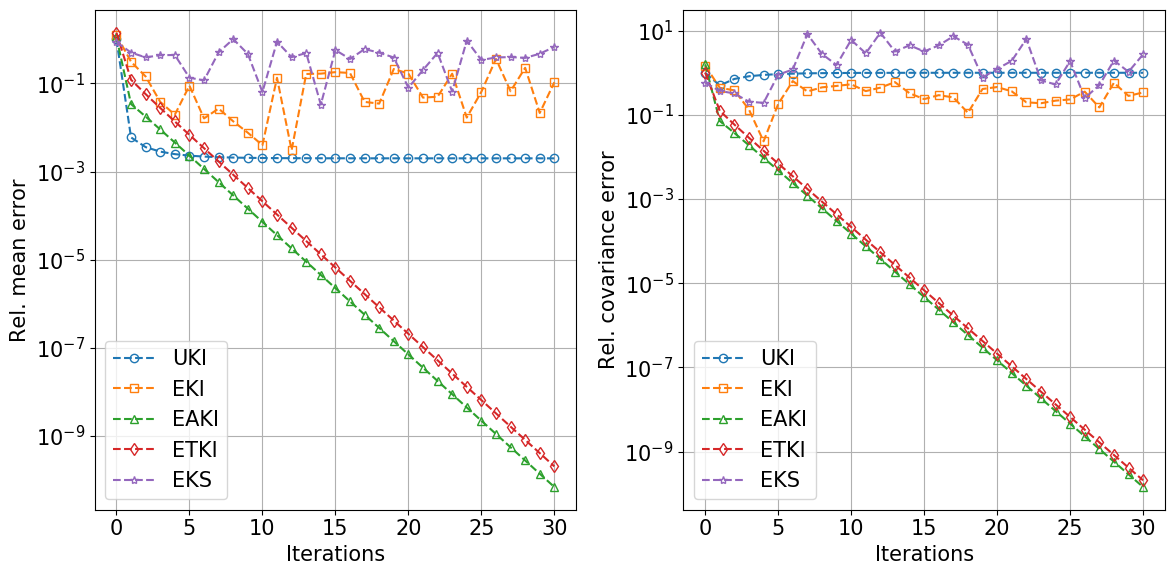

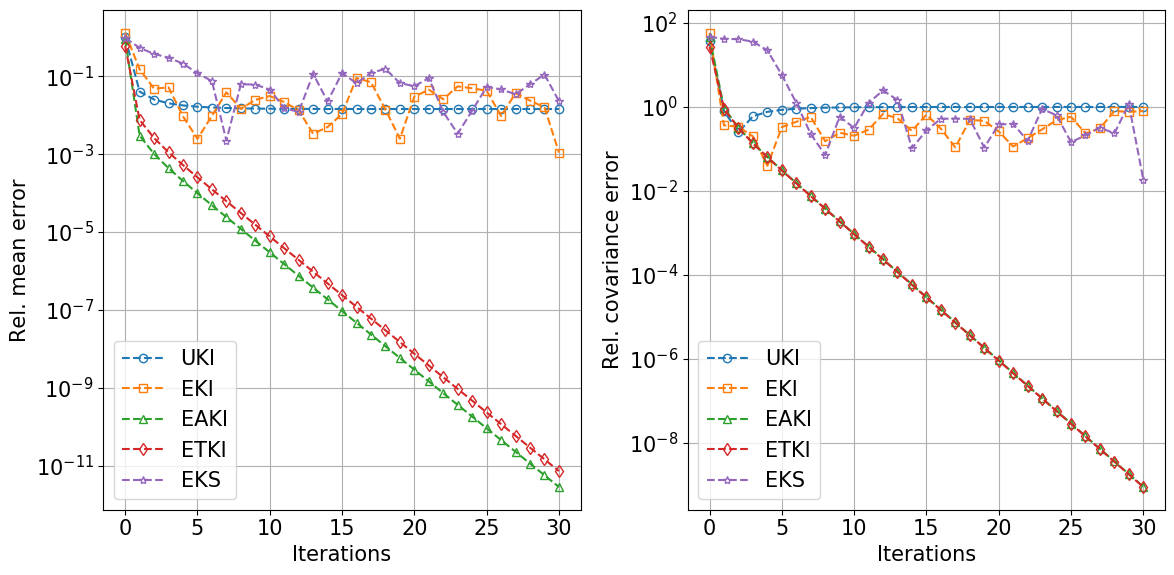


θ_p = [0.3624726108894178 1.3935195434877368; 0.3718624279523202 1.3861444653756767; 0.367167519420869 1.3890943824657482; 0.367167519420869 1.389586130443054]
(chol_xx_cov, c_weights[:, i]) = ([0.0054203278772745915 0.0; -0.004257308064511619 0.0004916647447826843], [-0.7071067811865475, 0.4082482904638631])
(chol_xx_cov, c_weights[:, i]) = ([0.0054203278772745915 0.0; -0.004257308064511619 0.0004916647447826843], [0.7071067811865475, 0.4082482904638631])
(chol_xx_cov, c_weights[:, i]) = ([0.0054203278772745915 0.0; -0.004257308064511619 0.0004916647447826843], [0.0, -0.8164965809277261])
θ_p = [0.3633294437347551 1.3928014897028902; 0.37099494493130586 1.3867807468988576; 0.3671621943330305 1.3891889544262572; 0.3671621943330305 1.389590397009335]
(chol_xx_cov, c_weights[:, i]) = ([0.0044251973537295 0.0; -0.003475699176693632 0.00040139729619720056], [-0.7071067811865475, 0.4082482904638631])
(chol_xx_cov, c_weights[:, i]) = ([0.0044251973537295 0.0; -0.003475699176693632 0.0004013

┌ Info: ([0.040547580458438426 -0.031836073165083835; -0.03183607316508362 0.025353090993284866], [0.08109516091687685 -0.06367214633016767; -0.06367214633016724 0.05070618198656973])
└ @ Main /Users/zhengyuh/Desktop/Code/InverseProblems.jl/Inversion/UKI.jl:286
┌ Info: ([0.01688303313628197 -0.013258611015856509; -0.013258611015856507 0.010555059696895928], [0.03376606627256394 -0.026517222031713018; -0.026517222031713014 0.021110119393791857])
└ @ Main /Users/zhengyuh/Desktop/Code/InverseProblems.jl/Inversion/UKI.jl:286
┌ Info: ([0.009002202599116764 -0.007070102561732358; -0.007070102561732358 0.005627835467380869], [0.018004405198233528 -0.014140205123464715; -0.014140205123464715 0.011255670934761737])
└ @ Main /Users/zhengyuh/Desktop/Code/InverseProblems.jl/Inversion/UKI.jl:286
┌ Info: ([0.005294838443838492 -0.004158562211140068; -0.004158562211140068 0.0033100701157943732], [0.010589676887676983 -0.008317124422280137; -0.008317124422280137 0.0066201402315887465])
└ @ Main /Users

In [17]:
include("../Inversion/KalmanInversion.jl")

FT = Float64
uki_objs = Dict()
mean_errors = Dict()

Random.seed!(123)
α_reg = 1.0
update_freq = 1
N_iter = 30
N_θ = 2
θ0_mean = zeros(FT, N_θ)
θθ0_cov = Array(Diagonal(fill(1.0^2, N_θ)))
θθ0_cov_sqrt = θθ0_cov
uscented_transform = "original-n+2"
for problem_type in ("under-determined", "over-determined")
    
    θ_post, Σ_post, G, y, Σ_η = Two_Param_Linear_Test(problem_type, θ0_mean, θθ0_cov)
    
    N_y = length(y)
    
    s_param = Setup_Param(G, N_θ, N_y)
    s_param_aug = Setup_Param(G, N_θ, N_y+N_θ)
    
        
    y_aug = [y ;θ0_mean]
    Σ_η_aug = [Σ_η zeros(Float64, N_y, N_θ); zeros(Float64, N_θ, N_y)  θθ0_cov]
 
    # UKI
    uki_obj = UKI_Run(s_param_aug, forward_aug, 
    θ0_mean, θθ0_cov,
    y_aug, Σ_η_aug,
    α_reg,
    update_freq,
    N_iter;
    uscented_transform=uscented_transform)
    
    original  = false
    eki_y = (original ? y : y_aug)
    eki_Σ_η = (original ? Σ_η : Σ_η_aug)
    eki_s_param = (original ? s_param : s_param_aug)
    eki_forward = (original ? forward : forward_aug) 
    
    
    N_θ_s = 5
    N_θ_l = 10
    
    γ_ω = (original ? 0.0 : 1.0)  
    γ_η = ( original ? 1.0 : (γ_ω + 1)/γ_ω ) 
    # EKI
    @info "To use the original EKI, uncomment EKI.jl line 88-89"
    filter_type = "EKI"
    N_ens = N_θ_s
    eki_obj_s = EKI_Run(eki_s_param, eki_forward, 
    filter_type,
    θ0_mean, θθ0_cov_sqrt,
    N_ens,
    eki_y, eki_Σ_η,
    γ_ω, γ_η,
    N_iter)
    
    N_ens = N_θ_l
    eki_obj_l = EKI_Run(eki_s_param, eki_forward, 
    filter_type,
    θ0_mean, θθ0_cov_sqrt,
    N_ens,
    eki_y, eki_Σ_η,
    γ_ω, γ_η,
    N_iter)
    
    # ETKI
    filter_type = "ETKI"
    N_ens = N_θ_s
    etki_obj_s = EKI_Run(eki_s_param, eki_forward, 
    filter_type,
    θ0_mean, θθ0_cov_sqrt,
    N_ens,
    eki_y, eki_Σ_η,
    γ_ω, γ_η,
    N_iter)
    
    N_ens = N_θ_l
    etki_obj_l = EKI_Run(eki_s_param, eki_forward, 
    filter_type,
    θ0_mean, θθ0_cov_sqrt,
    N_ens,
    eki_y, eki_Σ_η,
    γ_ω, γ_η,
    N_iter)
    
    
    # EAKI
    filter_type = "EAKI"
    N_ens = N_θ_s
    eaki_obj_s = EKI_Run(eki_s_param, eki_forward, 
    filter_type,
    θ0_mean, θθ0_cov_sqrt,
    N_ens,
    eki_y, eki_Σ_η,
    γ_ω, γ_η,
    N_iter)
    
    
    N_ens = N_θ_l
    eaki_obj_l = EKI_Run(eki_s_param, eki_forward, 
    filter_type,
    θ0_mean, θθ0_cov_sqrt,
    N_ens,
    eki_y, eki_Σ_η,
    γ_ω, γ_η,
    N_iter)
    
    
    # EKS
    N_ens = N_θ_s
    eks_obj_s = EKS_Run(s_param, forward, 
    θ0_mean, θθ0_cov,
    N_ens,
    y, Σ_η,
    N_iter)
    
    @info "EKS small J t = ", sum(eks_obj_s.Δt)
    
    N_ens = N_θ_l
    eks_obj_l = EKS_Run(s_param, forward, 
    θ0_mean, θθ0_cov,
    N_ens,
    y, Σ_η,
    N_iter)
    
    @info "EKS large J t = ", sum(eks_obj_s.Δt)
    
    
    
    uki_errors    = zeros(FT, N_iter+1, 2)
    eki_s_errors  = zeros(FT, N_iter+1, 2)
    eki_l_errors  = zeros(FT, N_iter+1, 2)
    eaki_s_errors = zeros(FT, N_iter+1, 2)
    eaki_l_errors = zeros(FT, N_iter+1, 2)
    etki_s_errors = zeros(FT, N_iter+1, 2)
    etki_l_errors = zeros(FT, N_iter+1, 2)
    eks_s_errors  = zeros(FT, N_iter+1, 2)
    eks_l_errors  = zeros(FT, N_iter+1, 2)
    
    for i = 1:N_iter+1
        uki_errors[i, 1] = norm(uki_obj.θ_mean[i] .- θ_post)/norm(θ_post)
        uki_errors[i, 2] = norm(uki_obj.θθ_cov[i] .- Σ_post)/norm(Σ_post)
        
        eki_s_errors[i, 1] = norm(dropdims(mean(eki_obj_s.θ[i], dims=1), dims=1) .- θ_post)/norm(θ_post)
        eki_s_errors[i, 2] = norm(construct_cov(eki_obj_s.θ[i]) .- Σ_post)/norm(Σ_post)
        
        eki_l_errors[i, 1] = norm(dropdims(mean(eki_obj_l.θ[i], dims=1), dims=1) .- θ_post)/norm(θ_post)
        eki_l_errors[i, 2] = norm(construct_cov(eki_obj_l.θ[i]) .- Σ_post)/norm(Σ_post)
        
        eaki_s_errors[i, 1] = norm(dropdims(mean(eaki_obj_s.θ[i], dims=1), dims=1) .- θ_post)/norm(θ_post)
        eaki_s_errors[i, 2] = norm(construct_cov(eaki_obj_s.θ[i]) .- Σ_post)/norm(Σ_post)
        
        eaki_l_errors[i, 1] = norm(dropdims(mean(eaki_obj_l.θ[i], dims=1), dims=1) .- θ_post)/norm(θ_post)
        eaki_l_errors[i, 2] = norm(construct_cov(eaki_obj_l.θ[i]) .- Σ_post)/norm(Σ_post)
        
        etki_s_errors[i, 1] = norm(dropdims(mean(etki_obj_s.θ[i], dims=1), dims=1) .- θ_post)/norm(θ_post)
        etki_s_errors[i, 2] = norm(construct_cov(etki_obj_s.θ[i]) .- Σ_post)/norm(Σ_post)
        
        etki_l_errors[i, 1] = norm(dropdims(mean(etki_obj_l.θ[i], dims=1), dims=1) .- θ_post)/norm(θ_post)
        etki_l_errors[i, 2] = norm(construct_cov(etki_obj_l.θ[i]) .- Σ_post)/norm(Σ_post)
        
        eks_s_errors[i, 1] = norm(dropdims(mean(eks_obj_s.θ[i], dims=1), dims=1) .- θ_post)/norm(θ_post)
        eks_s_errors[i, 2] = norm(construct_cov(eks_obj_s.θ[i]) .- Σ_post)/norm(Σ_post)
        
        eks_l_errors[i, 1] = norm(dropdims(mean(eks_obj_l.θ[i], dims=1), dims=1) .- θ_post)/norm(θ_post)
        eks_l_errors[i, 2] = norm(construct_cov(eks_obj_l.θ[i]) .- Σ_post)/norm(Σ_post)
        
    end
    
    ites = Array(0:N_iter)
    
#     fig, ax = PyPlot.subplots(nrows = 1, ncols=2, sharex=false, sharey=false, figsize=(12,6))
#     ax[1].semilogy(ites, uki_errors[:, 1],   "--o", color = "C0", fillstyle="none", label="UKI")
#     ax[1].semilogy(ites, eki_s_errors[:, 1], "--*", color = "C1", fillstyle="none", label="EKI (J=$(N_θ_s))")
#     ax[1].semilogy(ites, eki_l_errors[:, 1], "--s", color = "C2", fillstyle="none", label="EKI (J=$(N_θ_l))")
#     ax[1].semilogy(ites, eaki_s_errors[:, 1], "--*", color = "C3", fillstyle="none", label="EAKI (J=$(N_θ_s))")
#     ax[1].semilogy(ites, eaki_l_errors[:, 1], "--s", color = "C4", fillstyle="none", label="EAKI (J=$(N_θ_l))")
#     ax[1].semilogy(ites, etki_s_errors[:, 1], "--*", color = "C5", fillstyle="none", label="ETKI (J=$(N_θ_s))")
#     ax[1].semilogy(ites, etki_l_errors[:, 1], "--s", color = "C6", fillstyle="none", label="ETKI (J=$(N_θ_l))")
#     ax[1].semilogy(ites, eks_s_errors[:, 1], "--*", color = "C7", fillstyle="none", label="EKS (J=$(N_θ_s))")
#     ax[1].semilogy(ites, eks_l_errors[:, 1], "--s", color = "C8", fillstyle="none", label="EKS (J=$(N_θ_l))")
#     ax[1].set_xlabel("Iterations")
#     ax[1].set_ylabel("Rel. mean error")
#     ax[1].grid("on")
#     ax[1].legend()
    
#     ax[2].semilogy(ites, uki_errors[:, 2],   "--o", color = "C0", fillstyle="none", label="UKI")
#     ax[2].semilogy(ites, eki_s_errors[:, 2], "--*", color = "C1", fillstyle="none", label="EKI (J=$(N_θ_s))")
#     ax[2].semilogy(ites, eki_l_errors[:, 2], "--s", color = "C2", fillstyle="none", label="EKI (J=$(N_θ_l))")
#     ax[2].semilogy(ites, eaki_s_errors[:, 2], "--*", color = "C3", fillstyle="none", label="EAKI (J=$(N_θ_s))")
#     ax[2].semilogy(ites, eaki_l_errors[:, 2], "--s", color = "C4", fillstyle="none", label="EAKI (J=$(N_θ_l))")
#     ax[2].semilogy(ites, etki_s_errors[:, 2], "--*", color = "C5", fillstyle="none", label="ETKI (J=$(N_θ_s))")
#     ax[2].semilogy(ites, etki_l_errors[:, 2], "--s", color = "C6", fillstyle="none", label="ETKI (J=$(N_θ_l))")
#     ax[2].semilogy(ites, eks_s_errors[:, 2], "--*", color = "C7", fillstyle="none", label="EKS (J=$(N_θ_s))")
#     ax[2].semilogy(ites, eks_l_errors[:, 2], "--s", color = "C8", fillstyle="none", label="EKS (J=$(N_θ_l))")
#     ax[2].set_xlabel("Iterations")
#     ax[2].set_ylabel("Rel. covariance error")
#     ax[2].grid("on")
#     ax[2].legend()
#     fig.tight_layout()
#     fig.savefig("Linear-$(problem_type)-EKI.pdf")
    
    
    fig, ax = PyPlot.subplots(nrows = 1, ncols=2, sharex=false, sharey=false, figsize=(12,6))
    ax[1].semilogy(ites, uki_errors[:, 1],   "--o", color = "C0", fillstyle="none", label="UKI")
    ax[1].semilogy(ites, eki_l_errors[:, 1], "--s", color = "C1", fillstyle="none", label="EKI")
    ax[1].semilogy(ites, eaki_l_errors[:, 1], "--^", color = "C2", fillstyle="none", label="EAKI")
    ax[1].semilogy(ites, etki_l_errors[:, 1], "--d", color = "C3", fillstyle="none", label="ETKI")
    ax[1].semilogy(ites, eks_l_errors[:, 1], "--*", color = "C4", fillstyle="none", label="EKS")
    ax[1].set_xlabel("Iterations")
    ax[1].set_ylabel("Rel. mean error")
    ax[1].grid("on")
    ax[1].legend()
    
    ax[2].semilogy(ites, uki_errors[:, 2],   "--o", color = "C0", fillstyle="none", label="UKI")
    ax[2].semilogy(ites, eki_l_errors[:, 2], "--s", color = "C1", fillstyle="none", label="EKI")
    ax[2].semilogy(ites, eaki_l_errors[:, 2], "--^", color = "C2", fillstyle="none", label="EAKI")
    ax[2].semilogy(ites, etki_l_errors[:, 2], "--d", color = "C3", fillstyle="none", label="ETKI")
    ax[2].semilogy(ites, eks_l_errors[:, 2], "--*", color = "C4", fillstyle="none", label="EKS")
    ax[2].set_xlabel("Iterations")
    ax[2].set_ylabel("Rel. covariance error")
    ax[2].grid("on")
    ax[2].legend()
    fig.tight_layout()
    fig.savefig("Linear-$(problem_type).pdf")
end



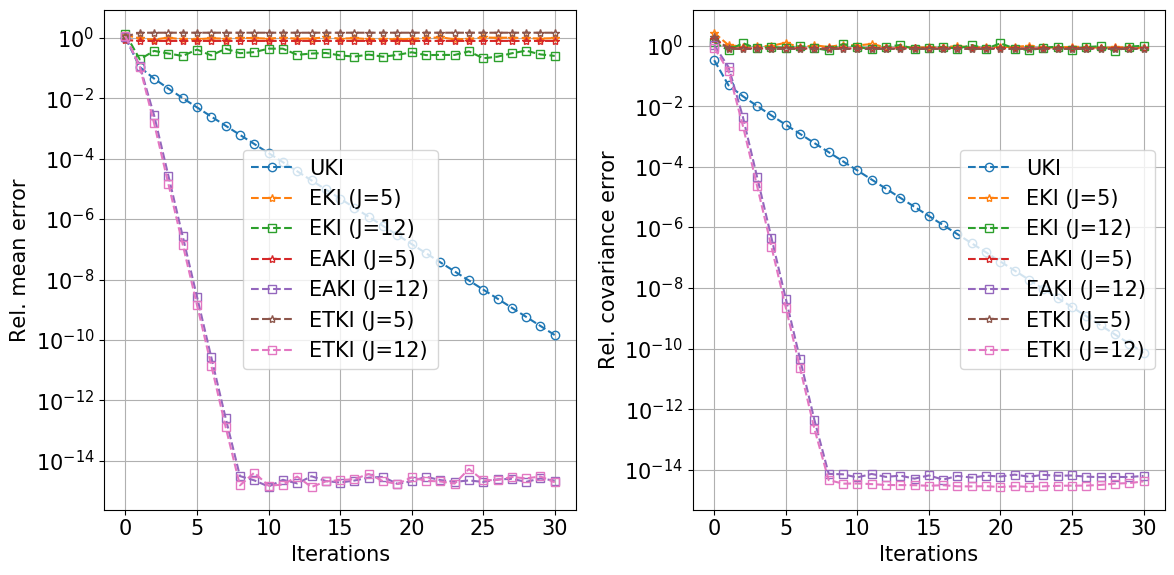

┌ Info: To use the original EKI, uncomment EKI.jl line 88-89
└ @ Main In[9]:47


In [9]:
FT = Float64
uki_objs = Dict()
mean_errors = Dict()

Random.seed!(123)
α_reg = 1.0
update_freq = 1
N_iter = 30
N_θ = 10
θ0_mean = zeros(FT, N_θ)
θθ0_cov = Array(Diagonal(fill(1.0^2, N_θ)))
θθ0_cov_sqrt = θθ0_cov
for problem_type in ("Hilbert", )
    
    θ_post, Σ_post, G, y, Σ_η = Two_Param_Linear_Test(problem_type, θ0_mean, θθ0_cov)
    
    N_y = length(y)
    
    s_param = Setup_Param(G, N_θ, N_y)
    s_param_aug = Setup_Param(G, N_θ, N_y+N_θ)
    
        
    y_aug = [y ;θ0_mean]
    Σ_η_aug = [Σ_η zeros(Float64, N_y, N_θ); zeros(Float64, N_θ, N_y)  θθ0_cov]
 
    # UKI
    uki_obj = UKI_Run(s_param_aug, forward_aug, 
    θ0_mean, θθ0_cov,
    y_aug, Σ_η_aug,
    α_reg,
    update_freq,
    N_iter)
    
    original  = false
    eki_y = (original ? y : y_aug)
    eki_Σ_η = (original ? Σ_η : Σ_η_aug)
    eki_s_param = (original ? s_param : s_param_aug)
    eki_forward = (original ? forward : forward_aug) 
    
    
    N_θ_s = 5
    N_θ_l = 12
    
    γ_ω = (original ? 0.0 : 100.0)  
    γ_η = ( original ? 1.0 : (γ_ω + 1)/γ_ω ) 
    # EKI
    @info "To use the original EKI, uncomment EKI.jl line 88-89"
    filter_type = "EKI"
    N_ens = N_θ_s
    eki_obj_s = EKI_Run(eki_s_param, eki_forward, 
    filter_type,
    θ0_mean, θθ0_cov_sqrt,
    N_ens,
    eki_y, eki_Σ_η,
    γ_ω, γ_η,
    N_iter)
    
    N_ens = N_θ_l
    eki_obj_l = EKI_Run(eki_s_param, eki_forward, 
    filter_type,
    θ0_mean, θθ0_cov_sqrt,
    N_ens,
    eki_y, eki_Σ_η,
    γ_ω, γ_η,
    N_iter)
    
    # ETKI
    filter_type = "ETKI"
    N_ens = N_θ_s
    etki_obj_s = EKI_Run(eki_s_param, eki_forward, 
    filter_type,
    θ0_mean, θθ0_cov_sqrt,
    N_ens,
    eki_y, eki_Σ_η,
    γ_ω, γ_η,
    N_iter)
    
    N_ens = N_θ_l
    etki_obj_l = EKI_Run(eki_s_param, eki_forward, 
    filter_type,
    θ0_mean, θθ0_cov_sqrt,
    N_ens,
    eki_y, eki_Σ_η,
    γ_ω, γ_η,
    N_iter)
    
    
    # EAKI
    filter_type = "EAKI"
    N_ens = N_θ_s
    eaki_obj_s = EKI_Run(eki_s_param, eki_forward, 
    filter_type,
    θ0_mean, θθ0_cov_sqrt,
    N_ens,
    eki_y, eki_Σ_η,
    γ_ω, γ_η,
    N_iter)
    
    
    N_ens = N_θ_l
    eaki_obj_l = EKI_Run(eki_s_param, eki_forward, 
    filter_type,
    θ0_mean, θθ0_cov_sqrt,
    N_ens,
    eki_y, eki_Σ_η,
    γ_ω, γ_η,
    N_iter)
    
    uki_errors    = zeros(FT, N_iter+1, 2)
    eki_s_errors  = zeros(FT, N_iter+1, 2)
    eki_l_errors  = zeros(FT, N_iter+1, 2)
    eaki_s_errors = zeros(FT, N_iter+1, 2)
    eaki_l_errors = zeros(FT, N_iter+1, 2)
    etki_s_errors = zeros(FT, N_iter+1, 2)
    etki_l_errors = zeros(FT, N_iter+1, 2)
    
    for i = 1:N_iter+1
        uki_errors[i, 1] = norm(uki_obj.θ_mean[i] .- θ_post)/norm(θ_post)
        uki_errors[i, 2] = norm(uki_obj.θθ_cov[i] .- Σ_post)/norm(Σ_post)
        
        eki_s_errors[i, 1] = norm(dropdims(mean(eki_obj_s.θ[i], dims=1), dims=1) .- θ_post)/norm(θ_post)
        eki_s_errors[i, 2] = norm(construct_cov(eki_obj_s.θ[i]) .- Σ_post)/norm(Σ_post)
        
        eki_l_errors[i, 1] = norm(dropdims(mean(eki_obj_l.θ[i], dims=1), dims=1) .- θ_post)/norm(θ_post)
        eki_l_errors[i, 2] = norm(construct_cov(eki_obj_l.θ[i]) .- Σ_post)/norm(Σ_post)
        
        eaki_s_errors[i, 1] = norm(dropdims(mean(eaki_obj_s.θ[i], dims=1), dims=1) .- θ_post)/norm(θ_post)
        eaki_s_errors[i, 2] = norm(construct_cov(eaki_obj_s.θ[i]) .- Σ_post)/norm(Σ_post)
        
        eaki_l_errors[i, 1] = norm(dropdims(mean(eaki_obj_l.θ[i], dims=1), dims=1) .- θ_post)/norm(θ_post)
        eaki_l_errors[i, 2] = norm(construct_cov(eaki_obj_l.θ[i]) .- Σ_post)/norm(Σ_post)
        
        etki_s_errors[i, 1] = norm(dropdims(mean(etki_obj_s.θ[i], dims=1), dims=1) .- θ_post)/norm(θ_post)
        etki_s_errors[i, 2] = norm(construct_cov(etki_obj_s.θ[i]) .- Σ_post)/norm(Σ_post)
        
        etki_l_errors[i, 1] = norm(dropdims(mean(etki_obj_l.θ[i], dims=1), dims=1) .- θ_post)/norm(θ_post)
        etki_l_errors[i, 2] = norm(construct_cov(etki_obj_l.θ[i]) .- Σ_post)/norm(Σ_post)
        
    end
    
    ites = Array(0:N_iter)
    
    fig, ax = PyPlot.subplots(nrows = 1, ncols=2, sharex=false, sharey=false, figsize=(12,6))
    ax[1].semilogy(ites, uki_errors[:, 1],   "--o", color = "C0", fillstyle="none", label="UKI")
    ax[1].semilogy(ites, eki_s_errors[:, 1], "--*", color = "C1", fillstyle="none", label="EKI (J=$(N_θ_s))")
    ax[1].semilogy(ites, eki_l_errors[:, 1], "--s", color = "C2", fillstyle="none", label="EKI (J=$(N_θ_l))")
    ax[1].semilogy(ites, eaki_s_errors[:, 1], "--*", color = "C3", fillstyle="none", label="EAKI (J=$(N_θ_s))")
    ax[1].semilogy(ites, eaki_l_errors[:, 1], "--s", color = "C4", fillstyle="none", label="EAKI (J=$(N_θ_l))")
    ax[1].semilogy(ites, etki_s_errors[:, 1], "--*", color = "C5", fillstyle="none", label="ETKI (J=$(N_θ_s))")
    ax[1].semilogy(ites, etki_l_errors[:, 1], "--s", color = "C6", fillstyle="none", label="ETKI (J=$(N_θ_l))")
    ax[1].set_xlabel("Iterations")
    ax[1].set_ylabel("Rel. mean error")
    ax[1].grid("on")
    ax[1].legend()
    
    ax[2].semilogy(ites, uki_errors[:, 2],   "--o", color = "C0", fillstyle="none", label="UKI")
    ax[2].semilogy(ites, eki_s_errors[:, 2], "--*", color = "C1", fillstyle="none", label="EKI (J=$(N_θ_s))")
    ax[2].semilogy(ites, eki_l_errors[:, 2], "--s", color = "C2", fillstyle="none", label="EKI (J=$(N_θ_l))")
    ax[2].semilogy(ites, eaki_s_errors[:, 2], "--*", color = "C3", fillstyle="none", label="EAKI (J=$(N_θ_s))")
    ax[2].semilogy(ites, eaki_l_errors[:, 2], "--s", color = "C4", fillstyle="none", label="EAKI (J=$(N_θ_l))")
    ax[2].semilogy(ites, etki_s_errors[:, 2], "--*", color = "C5", fillstyle="none", label="ETKI (J=$(N_θ_s))")
    ax[2].semilogy(ites, etki_l_errors[:, 2], "--s", color = "C6", fillstyle="none", label="ETKI (J=$(N_θ_l))")
    ax[2].set_xlabel("Iterations")
    ax[2].set_ylabel("Rel. covariance error")
    ax[2].grid("on")
    ax[2].legend()
    fig.tight_layout()
    fig.savefig("Linear-$(problem_type)-EKI.pdf")
end


